Overview
This project aims to analyze multi-source health data, including wearable metrics, digital logs, and healthcare records, to build a data-driven health insights model.

https://www.kaggle.com/datasets/manideepreddy966/wearables-dataset/data

The task has 3 distincts features.

1. use datasets available to train a Machine learning model

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data from user activity logs, digital logs and personal health logs

In [26]:
wearable_activity = pd.read_csv('/content/activity_environment_data.csv')
wearable_digital = pd.read_csv('/content/digital_interaction_data.csv')
wearable_personal = pd.read_csv('/content/personal_health_data.csv')

EDA

In [27]:
# Display column names for each dataset
print("Wearable Activity Columns:", wearable_activity.columns)
print("Wearable Digital Columns:", wearable_digital.columns)
print("Wearable Personal Columns:", wearable_personal.columns)


Wearable Activity Columns: Index(['User_ID', 'Timestamp', 'Steps', 'Calories_Burned', 'Distance_Covered',
       'Exercise_Type', 'Exercise_Duration', 'Exercise_Intensity',
       'Ambient_Temperature', 'Battery_Level', 'Altitude', 'UV_Exposure'],
      dtype='object')
Wearable Digital Columns: Index(['User_ID', 'Timestamp', 'Notifications_Received', 'Screen_Time'], dtype='object')
Wearable Personal Columns: Index(['User_ID', 'Age', 'Gender', 'Weight', 'Height', 'Medical_Conditions',
       'Medication', 'Smoker', 'Alcohol_Consumption', 'Timestamp',
       'Day_of_Week', 'Sleep_Duration', 'Deep_Sleep_Duration',
       'REM_Sleep_Duration', 'Wakeups', 'Snoring', 'Heart_Rate',
       'Blood_Oxygen_Level', 'ECG', 'Calories_Intake', 'Water_Intake',
       'Stress_Level', 'Mood', 'Skin_Temperature', 'Body_Fat_Percentage',
       'Muscle_Mass', 'Health_Score', 'Anomaly_Flag'],
      dtype='object')


In [28]:
# Check missing values in each dataset
datasets = [wearable_activity, wearable_digital, wearable_personal]

for i, df in enumerate(datasets):
    print(f"Dataset {i+1} Missing Values:\n", df.isnull().sum(), "\n")


Dataset 1 Missing Values:
 User_ID                   0
Timestamp                 0
Steps                     0
Calories_Burned           0
Distance_Covered          0
Exercise_Type          2601
Exercise_Duration         0
Exercise_Intensity     2601
Ambient_Temperature       0
Battery_Level             0
Altitude                  0
UV_Exposure               0
dtype: int64 

Dataset 2 Missing Values:
 User_ID                   0
Timestamp                 0
Notifications_Received    0
Screen_Time               0
dtype: int64 

Dataset 3 Missing Values:
 User_ID                   0
Age                       0
Gender                    0
Weight                    0
Height                    0
Medical_Conditions     3304
Medication                0
Smoker                    0
Alcohol_Consumption    3360
Timestamp                 0
Day_of_Week               0
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        0
Wakeups                   0
Snoring              

In [29]:
# Merge wearable datasets
# Merge wearable datasets on User_ID and Timestamp
wearable_final = wearable_activity.merge(wearable_digital, on=['User_ID', 'Timestamp'], how='outer')\
                                 .merge(wearable_personal, on=['User_ID', 'Timestamp'], how='outer')

# Save wearable data
wearable_final.to_csv("/content/wearable_final.csv", index=False)

print("Wearable data saved successfully!")



Wearable data saved successfully!


In [30]:
wearable_final

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,U_00001,2021-01-01 00:00:00,9146,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,...,Abnormal,2444.985808,3.105556,Moderate,Neutral,32.752993,17.432985,77.599448,25.992071,1
1,U_00002,2021-01-01 01:00:00,9362,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,...,Normal,2199.777020,2.441118,High,Anxious,35.010044,23.957792,71.718936,64.308450,0
2,U_00003,2021-01-01 02:00:00,21,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,...,Abnormal,2182.755640,1.240341,Low,Sad,36.797523,22.995533,59.874936,78.003546,1
3,U_00004,2021-01-01 03:00:00,13252,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,...,Normal,1451.218888,1.682383,Moderate,Happy,32.614592,13.410659,67.528098,16.454106,1
4,U_00005,2021-01-01 04:00:00,21,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,...,Normal,1583.562773,1.461862,High,Happy,33.602319,24.920020,54.741487,42.528202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,9.9544,NaN,0.000000,NaN,34.428771,66.802901,...,Abnormal,2482.932911,1.035077,High,Neutral,34.745721,33.741322,51.081034,30.989037,1
9996,U_09997,2022-02-21 12:00:00,4492,224.60,3.5936,Yoga,0.592288,High,32.068240,62.079895,...,Normal,2196.032378,1.038702,Low,Anxious,37.668751,16.143912,45.321272,33.479601,0
9997,U_09998,2022-02-21 13:00:00,4081,204.05,3.2648,Yoga,0.888462,Moderate,38.776620,85.657028,...,Abnormal,1259.932859,2.063028,Moderate,Sad,36.353827,24.003121,69.109082,63.361551,1
9998,U_09999,2022-02-21 14:00:00,10319,515.95,8.2552,Strength Training,0.922524,Low,34.319393,83.703078,...,Abnormal,2156.686543,1.619009,Moderate,Happy,37.443824,10.134327,36.225962,60.795266,1


In [31]:
wearable_df = wearable_final

In [32]:
# Clean column names
wearable_df.columns = wearable_df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Display updated column names
print("Updated Column Names:", wearable_df.columns)


Updated Column Names: Index(['user_id', 'timestamp', 'steps', 'calories_burned', 'distance_covered',
       'exercise_type', 'exercise_duration', 'exercise_intensity',
       'ambient_temperature', 'battery_level', 'altitude', 'uv_exposure',
       'notifications_received', 'screen_time', 'age', 'gender', 'weight',
       'height', 'medical_conditions', 'medication', 'smoker',
       'alcohol_consumption', 'day_of_week', 'sleep_duration',
       'deep_sleep_duration', 'rem_sleep_duration', 'wakeups', 'snoring',
       'heart_rate', 'blood_oxygen_level', 'ecg', 'calories_intake',
       'water_intake', 'stress_level', 'mood', 'skin_temperature',
       'body_fat_percentage', 'muscle_mass', 'health_score', 'anomaly_flag'],
      dtype='object')


In [33]:
# Check missing values
print("Missing Values in Wearable Data:\n", wearable_df.isnull().sum())

# Fill numerical missing values with median
wearable_df.fillna(wearable_df.median(numeric_only=True), inplace=True)

# Fill categorical missing values with 'unknown'
wearable_df.fillna("unknown", inplace=True)

# Verify missing values handled
print("Missing values after handling:\n", wearable_df.isnull().sum())


Missing Values in Wearable Data:
 user_id                      0
timestamp                    0
steps                        0
calories_burned              0
distance_covered             0
exercise_type             2601
exercise_duration            0
exercise_intensity        2601
ambient_temperature          0
battery_level                0
altitude                     0
uv_exposure                  0
notifications_received       0
screen_time                  0
age                          0
gender                       0
weight                       0
height                       0
medical_conditions        3304
medication                   0
smoker                       0
alcohol_consumption       3360
day_of_week                  0
sleep_duration               0
deep_sleep_duration          0
rem_sleep_duration           0
wakeups                      0
snoring                      0
heart_rate                   0
blood_oxygen_level           0
ecg                          0
calor

In [34]:
# Drop duplicate rows
wearable_df.drop_duplicates(inplace=True)

print("Duplicates removed")


Duplicates removed


In [35]:
# Convert timestamp column to datetime format
wearable_df['timestamp'] = pd.to_datetime(wearable_df['timestamp'], errors='coerce')

# Convert numeric columns to correct types
numeric_cols = ['steps', 'calories_burned', 'distance_covered', 'heart_rate']
wearable_df[numeric_cols] = wearable_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("Data types validated!")


Data types validated!


In [36]:
# Function to remove outliers using Interquartile Range
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply outlier removal to numeric columns
for col in numeric_cols:
    wearable_df = remove_outliers(wearable_df, col)

print("Outliers removed!")


Outliers removed!


In [37]:
wearable_df.to_csv("/content/wearable_features.csv", index=False)



Now that the data is cleaned, we will move to feature engineering, where we create meaningful features that improve analysis and model performance.

Wearable Data (wearable_cleaned.csv)
 New Features to Create:

Activity Ratio → steps / calories_burned
Sleep Efficiency → deep_sleep_duration / sleep_duration
Heart Rate Variability → max(heart_rate) - min(heart_rate)

Transform Categorical Data:

Convert exercise_type, mood, stress_level into numeric encoding.

In [38]:
# Create new features
wearable_df['activity_ratio'] = wearable_df['steps'] / wearable_df['calories_burned']
wearable_df['sleep_efficiency'] = wearable_df['deep_sleep_duration'] / wearable_df['sleep_duration']
wearable_df['heart_rate_variability'] = wearable_df['heart_rate'].max() - wearable_df['heart_rate'].min()


In [39]:
# Encode categorical columns
categorical_cols = ['exercise_type', 'mood', 'stress_level']
wearable_df = pd.get_dummies(wearable_df, columns=categorical_cols)

In [16]:
wearable_df.to_csv("/content/wearable_features.csv", index=False)

In [40]:
wearable_df.columns

Index(['user_id', 'timestamp', 'steps', 'calories_burned', 'distance_covered',
       'exercise_duration', 'exercise_intensity', 'ambient_temperature',
       'battery_level', 'altitude', 'uv_exposure', 'notifications_received',
       'screen_time', 'age', 'gender', 'weight', 'height',
       'medical_conditions', 'medication', 'smoker', 'alcohol_consumption',
       'day_of_week', 'sleep_duration', 'deep_sleep_duration',
       'rem_sleep_duration', 'wakeups', 'snoring', 'heart_rate',
       'blood_oxygen_level', 'ecg', 'calories_intake', 'water_intake',
       'skin_temperature', 'body_fat_percentage', 'muscle_mass',
       'health_score', 'anomaly_flag', 'activity_ratio', 'sleep_efficiency',
       'heart_rate_variability', 'exercise_type_Running',
       'exercise_type_Strength Training', 'exercise_type_Yoga',
       'exercise_type_unknown', 'mood_Anxious', 'mood_Happy', 'mood_Neutral',
       'mood_Sad', 'stress_level_High', 'stress_level_Low',
       'stress_level_Moderate'],
  

In [41]:
wearable_df

,user_id,timestamp,steps,calories_burned,distance_covered,exercise_duration,exercise_intensity,ambient_temperature,battery_level,altitude,...,exercise_type_Strength Training,exercise_type_Yoga,exercise_type_unknown,mood_Anxious,mood_Happy,mood_Neutral,mood_Sad,stress_level_High,stress_level_Low,stress_level_Moderate
0,U_00001,2021-01-01 00:00:00,9146,457.30,7.3168,1.219675,Low,27.271525,97.338777,1739.690662,...,False,False,False,False,False,True,False,False,False,True
1,U_00002,2021-01-01 01:00:00,9362,468.10,7.4896,1.378399,Moderate,24.430288,66.573240,4102.042824,...,False,True,False,True,False,False,False,True,False,False
2,U_00003,2021-01-01 02:00:00,21,1.05,0.0168,0.803857,Moderate,29.340574,30.138828,1794.899935,...,True,False,False,False,False,False,True,False,True,False
3,U_00004,2021-01-01 03:00:00,13252,662.60,10.6016,0.000000,unknown,25.289230,78.838640,4025.840921,...,False,False,True,False,True,False,False,False,False,True
4,U_00005,2021-01-01 04:00:00,21,1.05,0.0168,0.807389,High,21.853590,17.673261,3422.381447,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U_09996,2022-02-21 11:00:00,12443,622.15,9.9544,0.000000,unknown,34.428771,66.802901,4736.969993,...,False,False,True,False,False,True,False,True,False,False
9996,U_09997,2022-02-21 12:00:00,4492,224.60,3.5936,0.592288,High,32.068240,62.079895,3763.910549,...,False,True,False,True,False,False,False,False,True,False
9997,U_09998,2022-02-21 13:00:00,4081,204.05,3.2648,0.888462,Moderate,38.776620,85.657028,2726.024512,...,False,True,False,False,False,False,True,False,False,True
9998,U_09999,2022-02-21 14:00:00,10319,515.95,8.2552,0.922524,Low,34.319393,83.703078,2391.196197,...,True,False,False,False,True,False,False,False,False,True


In [42]:
column_types = wearable_df.dtypes
print("Current Data Types:\n", column_types)

Current Data Types:
 user_id                                    object
timestamp                          datetime64[ns]
steps                                       int64
calories_burned                           float64
distance_covered                          float64
exercise_duration                         float64
exercise_intensity                         object
ambient_temperature                       float64
battery_level                             float64
altitude                                  float64
uv_exposure                               float64
notifications_received                      int64
screen_time                               float64
age                                         int64
gender                                     object
weight                                    float64
height                                    float64
medical_conditions                         object
medication                                 object
smoker                       

In [43]:
# Drop unnecessary columns
columns_to_drop = ['user_id', 'timestamp', 'anomaly_flag', 'exercise_type_unknown']

wearable_df.drop(columns=[col for col in columns_to_drop if col in wearable_df.columns], inplace=True)

In [44]:
categorical_columns = [
    'exercise_intensity', 'gender', 'medical_conditions',
    'medication', 'smoker', 'alcohol_consumption', 'day_of_week',
    'snoring', 'ecg'
]

In [45]:
if not all(col in wearable_df.columns for col in categorical_cols):
    print("Warning: Some categorical columns are missing!")

In [46]:
# Find missing categorical columns
missing_categorical = [col for col in categorical_columns if col not in wearable_df.columns]
print("Missing Categorical Columns:", missing_categorical)


Missing Categorical Columns: []


In [47]:
# Apply One-Hot Encoding to categorical columns
wearable_df = pd.get_dummies(wearable_df, columns=categorical_columns, drop_first=True)

In [48]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = wearable_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
wearable_df[numeric_cols] = scaler.fit_transform(wearable_df[numeric_cols])

print(" Numerical features scaled.")


 Numerical features scaled.


In [49]:
# Check if numerical columns are normalized (mean ≈ 0, std ≈ 1)
normalized_summary = wearable_df.describe().T[['mean', 'std']]
print("Normalization Check:\n", normalized_summary)

# Check if categorical columns are correctly encoded (should contain only 0s and 1s)
categorical_summary = wearable_df.select_dtypes(include=['uint8', 'bool']).sum()
print("\nCategorical Encoding Check (Unique Values Count per Column):\n", categorical_summary)


Normalization Check:
                                 mean           std
steps                  -3.197442e-17  1.000050e+00
calories_burned        -1.065814e-18  1.000050e+00
distance_covered       -1.755041e-16  1.000050e+00
exercise_duration      -9.769963e-17  1.000050e+00
ambient_temperature     9.094947e-17  1.000050e+00
battery_level          -1.421085e-17  1.000050e+00
altitude               -5.986323e-17  1.000050e+00
uv_exposure            -2.273737e-17  1.000050e+00
notifications_received -1.094236e-16  1.000050e+00
screen_time            -1.140421e-16  1.000050e+00
age                    -6.039613e-17  1.000050e+00
weight                 -2.160050e-16  1.000050e+00
height                 -1.818989e-16  1.000050e+00
sleep_duration         -1.939782e-16  1.000050e+00
deep_sleep_duration     1.218581e-16  1.000050e+00
rem_sleep_duration     -6.963319e-17  1.000050e+00
wakeups                -3.410605e-17  1.000050e+00
heart_rate             -9.183765e-17  1.000050e+00
blood_oxy

In [ ]:
# Identify constant or low-variance columns
#low_variance_cols = [col for col in wearable_df.columns if wearable_df[col].std() == 0]

# Drop them from the dataset
#wearable_df.drop(columns=low_variance_cols, inplace=True)

#print(f"✅ Dropped low-variance columns: {low_variance_cols}")

In [50]:
wearable_df.columns

Index(['steps', 'calories_burned', 'distance_covered', 'exercise_duration',
       'ambient_temperature', 'battery_level', 'altitude', 'uv_exposure',
       'notifications_received', 'screen_time', 'age', 'weight', 'height',
       'sleep_duration', 'deep_sleep_duration', 'rem_sleep_duration',
       'wakeups', 'heart_rate', 'blood_oxygen_level', 'calories_intake',
       'water_intake', 'skin_temperature', 'body_fat_percentage',
       'muscle_mass', 'health_score', 'activity_ratio', 'sleep_efficiency',
       'heart_rate_variability', 'exercise_type_Running',
       'exercise_type_Strength Training', 'exercise_type_Yoga', 'mood_Anxious',
       'mood_Happy', 'mood_Neutral', 'mood_Sad', 'stress_level_High',
       'stress_level_Low', 'stress_level_Moderate', 'exercise_intensity_Low',
       'exercise_intensity_Moderate', 'exercise_intensity_unknown',
       'gender_Male', 'gender_Other', 'medical_conditions_Hypertension',
       'medical_conditions_unknown', 'medication_Yes', 'smoker_

Top Features Correlated with Health Score:
 health_score                       1.000000
blood_oxygen_level                 0.838825
sleep_duration                     0.452571
rem_sleep_duration                 0.197033
deep_sleep_duration                0.169706
exercise_duration                  0.167870
ecg_Normal                         0.129457
alcohol_consumption_unknown        0.097101
stress_level_Low                   0.091366
exercise_intensity_Moderate        0.052341
exercise_type_Strength Training    0.048325
exercise_type_Yoga                 0.047922
exercise_intensity_Low             0.042603
exercise_type_Running              0.041131
uv_exposure                        0.019779
Name: health_score, dtype: float64


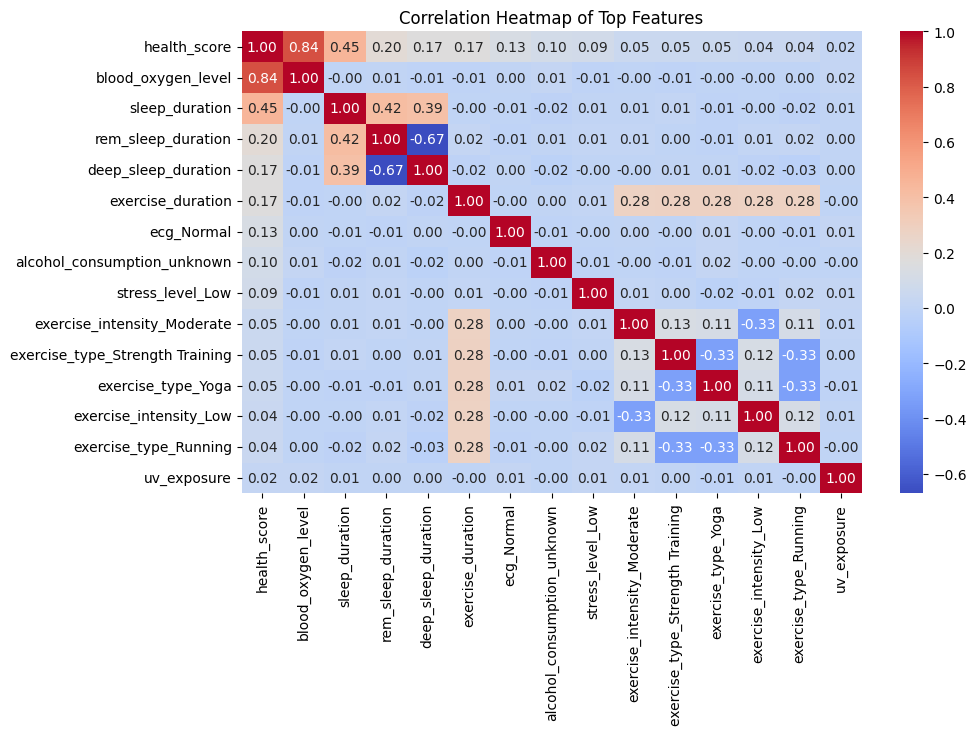

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate correlation with health_score
correlation = wearable_df.corr()['health_score'].sort_values(ascending=False)

# Display top correlated features
print("Top Features Correlated with Health Score:\n", correlation.head(15))

# Plot correlation heatmap for top 15 features
plt.figure(figsize=(10,6))
sns.heatmap(wearable_df[correlation.index[:15]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top Features")
plt.show()


In [52]:
# Define selected features
selected_features = [
    'blood_oxygen_level', 'sleep_duration', 'rem_sleep_duration',
    'deep_sleep_duration', 'exercise_duration', 'ecg_Normal',
    'alcohol_consumption_unknown', 'stress_level_Low', 'exercise_intensity_Moderate'
]

# Keep only selected features and target
wearable_selected = wearable_df[selected_features + ['health_score']]

print("Dataset filtered to include only top predictive features.")


Dataset filtered to include only top predictive features.


In [53]:
wearable_selected

,blood_oxygen_level,sleep_duration,rem_sleep_duration,deep_sleep_duration,exercise_duration,ecg_Normal,alcohol_consumption_unknown,stress_level_Low,exercise_intensity_Moderate,health_score
0,-1.520226,-0.285949,0.210325,-0.445525,0.446333,False,False,False,False,-1.330309
1,0.520073,0.292320,1.563989,-1.342050,0.686395,True,False,False,True,0.820382
2,1.283347,0.903238,-0.676796,1.419860,-0.182574,False,False,True,True,1.589086
3,-1.272424,-1.490832,-0.696644,-0.510952,-1.398371,True,False,False,False,-1.865674
4,0.191962,-0.579210,-0.795061,0.331346,-0.177232,True,False,False,False,-0.402139
...,...,...,...,...,...,...,...,...,...,...
9995,-1.056673,0.756228,1.918333,-1.322052,-1.398371,False,False,False,False,-1.049830
9996,-0.770027,-0.955703,-1.281786,0.516338,-0.502562,True,True,True,False,-0.910036
9997,0.140214,1.152781,1.443643,-0.519284,-0.054612,False,True,False,True,0.767233
9998,1.549547,-1.468149,0.184040,-1.382311,-0.003096,False,False,False,False,0.623188


In [54]:
from sklearn.model_selection import train_test_split

# Define target variable: health_score
X = wearable_selected.drop(columns=['health_score'])
y = wearable_selected['health_score']

# Split the dataset 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split completed: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples.")


Data split completed: 8000 training samples, 2000 testing samples.


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Model Training Complete!")
print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")


 Model Training Complete!
MAE: 0.1580 | MSE: 0.0372 | R² Score: 0.9638


In [56]:
# Install XGBoost (if needed)
!pip install xgboost


In [57]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Training Complete!")
print(f"MAE: {mae_xgb:.4f} | MSE: {mse_xgb:.4f} | R² Score: {r2_xgb:.4f}")


XGBoost Model Training Complete!
MAE: 0.1412 | MSE: 0.0277 | R² Score: 0.9731


XGBoost Seems better

feature importance for random forest

<ipython-input-58-95228393e89b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance['Importance'], y=rf_feature_importance['Feature'], palette="viridis")


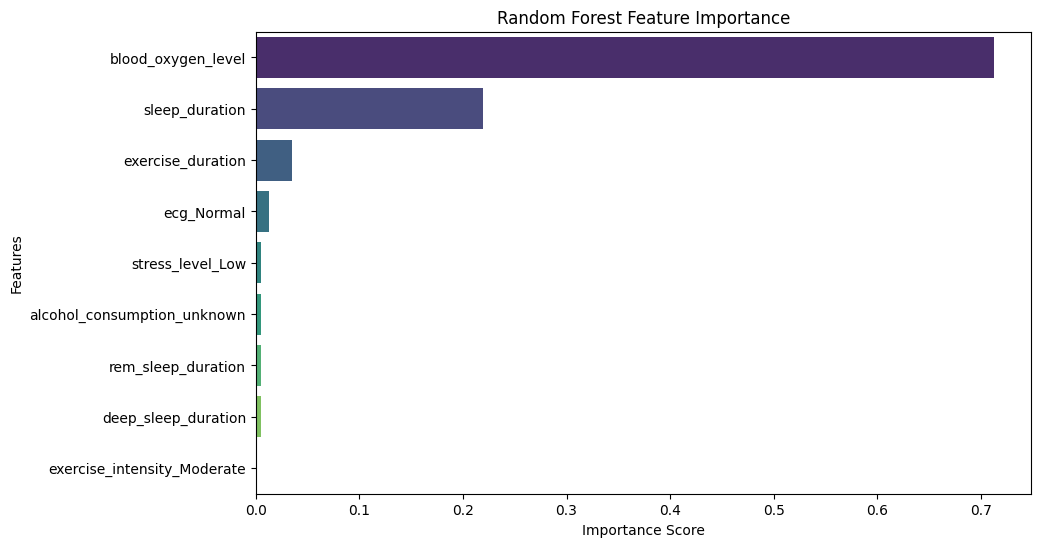

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
rf_importance = rf_model.feature_importances_

# Create DataFrame for visualization
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=rf_feature_importance['Importance'], y=rf_feature_importance['Feature'], palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


xg boost feature importance

<ipython-input-59-1fb34573e0e8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_feature_importance['Importance'], y=xgb_feature_importance['Feature'], palette="plasma")


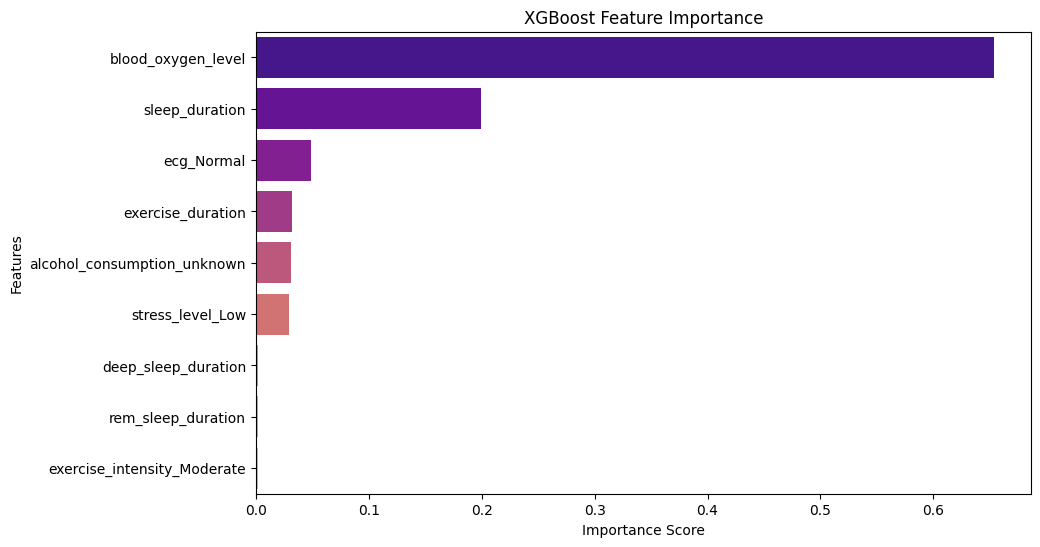

In [59]:
# Get feature importance from XGBoost
xgb_importance = xgb_model.feature_importances_

# Create DataFrame for visualization
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_feature_importance['Importance'], y=xgb_feature_importance['Feature'], palette="plasma")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


RF grid search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search with Cross-Validation
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Get best parameters
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

print(" Best Random Forest Parameters:", best_rf_params)

# Evaluate best model
rf_best_pred = best_rf_model.predict(X_test)
rf_best_r2 = r2_score(y_test, rf_best_pred)
print(f" Optimized Random Forest R² Score: {rf_best_r2:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
✅ Optimized Random Forest R² Score: 0.9650


XG grid search

In [ ]:
from xgboost import XGBRegressor

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight updates
    'max_depth': [3, 6, 10],  # Tree depth
    'subsample': [0.7, 0.9, 1.0],  # Fraction of samples per boosting round
    'colsample_bytree': [0.7, 0.9, 1.0]  # Fraction of features per tree
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Grid Search with Cross-Validation
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Get best parameters
best_xgb_params = xgb_grid_search.best_params_
best_xgb_model = xgb_grid_search.best_estimator_

print(" Best XGBoost Parameters:", best_xgb_params)

# Evaluate best model
xgb_best_pred = best_xgb_model.predict(X_test)
xgb_best_r2 = r2_score(y_test, xgb_best_pred)
print(f" Optimized XGBoost R² Score: {xgb_best_r2:.4f}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
✅ Best XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
✅ Optimized XGBoost R² Score: 0.9750


XG better

In [60]:
# Install SHAP if not installed
!pip install shap


In [61]:
# Check data types
print(X_train.dtypes)


blood_oxygen_level             float64
sleep_duration                 float64
rem_sleep_duration             float64
deep_sleep_duration            float64
exercise_duration              float64
ecg_Normal                        bool
alcohol_consumption_unknown       bool
stress_level_Low                  bool
exercise_intensity_Moderate       bool
dtype: object


Final Interpretation

Oxygen levels & sleep are the biggest predictors of health.

Exercise boosts health_score, but not as much as sleep or oxygen.

Low stress positively impacts the prediction.

Some sleep patterns (e.g., deep sleep imbalance) may lower the score.

In [64]:
print("Columns in Wearable Data:")
print(wearable_df.columns.tolist())


Columns in Wearable Data:
['steps', 'calories_burned', 'distance_covered', 'exercise_duration', 'ambient_temperature', 'battery_level', 'altitude', 'uv_exposure', 'notifications_received', 'screen_time', 'age', 'weight', 'height', 'sleep_duration', 'deep_sleep_duration', 'rem_sleep_duration', 'wakeups', 'heart_rate', 'blood_oxygen_level', 'calories_intake', 'water_intake', 'skin_temperature', 'body_fat_percentage', 'muscle_mass', 'health_score', 'activity_ratio', 'sleep_efficiency', 'heart_rate_variability', 'exercise_type_Running', 'exercise_type_Strength Training', 'exercise_type_Yoga', 'mood_Anxious', 'mood_Happy', 'mood_Neutral', 'mood_Sad', 'stress_level_High', 'stress_level_Low', 'stress_level_Moderate', 'exercise_intensity_Low', 'exercise_intensity_Moderate', 'exercise_intensity_unknown', 'gender_Male', 'gender_Other', 'medical_conditions_Hypertension', 'medical_conditions_unknown', 'medication_Yes', 'smoker_Yes', 'alcohol_consumption_Moderate', 'alcohol_consumption_unknown', 'd

In [65]:
import joblib

# Extract feature column names from the dataset
feature_columns = wearable_df.drop(columns=["health_score"], errors="ignore").columns.tolist()

# Save feature list
joblib.dump(feature_columns, "feature_columns.pkl")

print(" Feature columns saved successfully!")


✅ Feature columns saved successfully!


In [66]:
import pandas as pd
import joblib

# Load dataset (ensure it's the latest cleaned version)
#wearable_df = pd.read_csv("wearable_cleaned.csv")  # Update with actual file path

# List of features to remove
features_to_remove = [
    'ambient_temperature', 'battery_level', 'altitude', 'uv_exposure',
    'notifications_received', 'screen_time',
    'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
    'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'
]

# Remove features from dataset
wearable_df = wearable_df.drop(columns=features_to_remove, errors="ignore")

# Save updated feature list
feature_columns = wearable_df.drop(columns=["health_score"], errors="ignore").columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

print(f" Removed {len(features_to_remove)} features. Updated feature list saved as `feature_columns.pkl`.")


 Removed 12 features. Updated feature list saved as `feature_columns.pkl`.


In [67]:
from sklearn.model_selection import train_test_split

# Define target variable
target = "health_score"

# Split into features (X) and target (y)
X = wearable_df.drop(columns=[target])
y = wearable_df[target]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Data split into training and testing sets.")


✅ Data split into training and testing sets.


In [68]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the best hyperparameters found earlier
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 300,
    'subsample': 0.9
}

# Train the XGBoost model
model = xgb.XGBRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Training Complete! \nMAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")


Model Training Complete! 
MAE: 0.0302 | MSE: 0.0015 | R² Score: 0.9986


In [69]:
# Check model's expected features
print(" Model was trained on these features:")
print(model.feature_names_in_)

 Model was trained on these features:
['steps' 'calories_burned' 'distance_covered' 'exercise_duration' 'age'
 'weight' 'height' 'sleep_duration' 'deep_sleep_duration'
 'rem_sleep_duration' 'wakeups' 'heart_rate' 'blood_oxygen_level'
 'calories_intake' 'water_intake' 'skin_temperature' 'body_fat_percentage'
 'muscle_mass' 'activity_ratio' 'sleep_efficiency'
 'heart_rate_variability' 'exercise_type_Running'
 'exercise_type_Strength Training' 'exercise_type_Yoga' 'mood_Anxious'
 'mood_Happy' 'mood_Neutral' 'mood_Sad' 'stress_level_High'
 'stress_level_Low' 'stress_level_Moderate' 'exercise_intensity_Low'
 'exercise_intensity_Moderate' 'exercise_intensity_unknown' 'gender_Male'
 'gender_Other' 'medical_conditions_Hypertension'
 'medical_conditions_unknown' 'medication_Yes' 'smoker_Yes'
 'alcohol_consumption_Moderate' 'alcohol_consumption_unknown'
 'snoring_Yes' 'ecg_Normal']


In [70]:
import joblib

# Save the trained model
joblib.dump(model, "health_score_xgboost.pkl")

# Save the feature list (after preprocessing)
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

print(" Model and feature list saved successfully!")


✅ Model and feature list saved successfully!


Closer look to feature selection

                         Feature  Importance
12            blood_oxygen_level    0.459414
7                 sleep_duration    0.160322
43                    ecg_Normal    0.066155
39                    smoker_Yes    0.054728
33    exercise_intensity_unknown    0.048447
3              exercise_duration    0.039743
9             rem_sleep_duration    0.036261
28             stress_level_High    0.034612
41   alcohol_consumption_unknown    0.033458
29              stress_level_Low    0.030209
8            deep_sleep_duration    0.022476
40  alcohol_consumption_Moderate    0.011787
19              sleep_efficiency    0.000799
31        exercise_intensity_Low    0.000210
5                         weight    0.000095


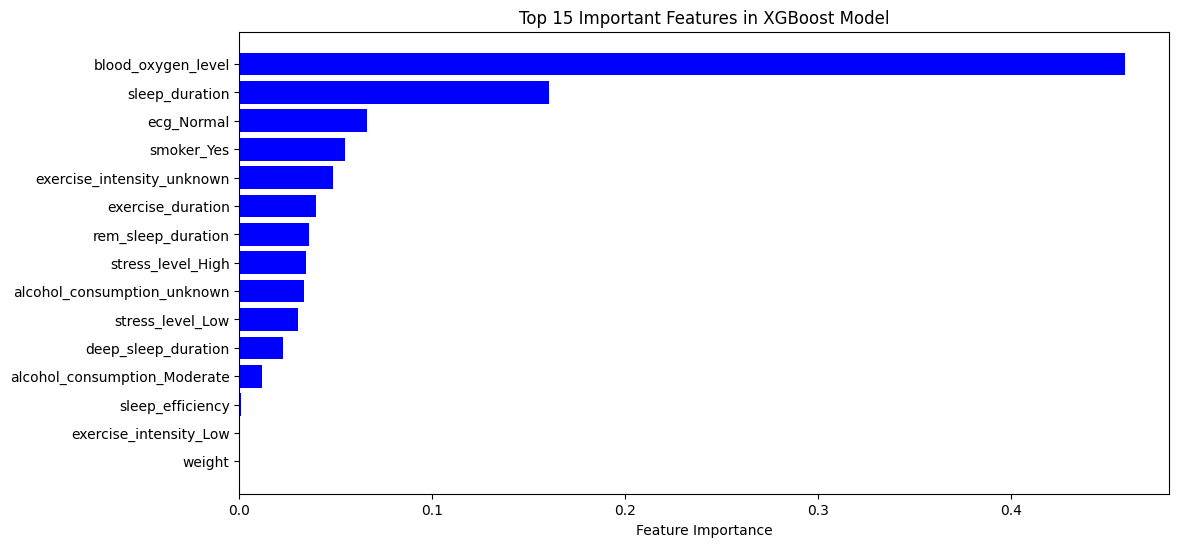

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': model.feature_names_in_, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df.head(15))  # Show top 15 features

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features in XGBoost Model')
plt.show()


In [72]:

threshold = 0.01


selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model
model2 = xgb.XGBRegressor(**best_params, random_state=42)
model2.fit(X_train_selected, y_train)

# Predict and evaluate again
y_pred = model2.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Retrained Model: \nMAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")


Retrained Model: 
MAE: 0.0271 | MSE: 0.0012 | R² Score: 0.9988


In [73]:
# Check model's expected features
print(" Model was trained on these features:")
print(model2.feature_names_in_)

 Model was trained on these features:
['blood_oxygen_level' 'sleep_duration' 'ecg_Normal' 'smoker_Yes'
 'exercise_intensity_unknown' 'exercise_duration' 'rem_sleep_duration'
 'stress_level_High' 'alcohol_consumption_unknown' 'stress_level_Low'
 'deep_sleep_duration' 'alcohol_consumption_Moderate']


Overfitting seems like a problem here

In [76]:
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [78]:
import xgboost
print(xgboost.__version__)



2.1.4


running a 5 fold CV

In [87]:
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb

# Initialize model with optimized parameters
model3 = xgb.XGBRegressor(**best_params, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model3, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_mse = -cv_scores

# Print cross-validation results
print(f"Cross-Validation Results:")
print(f"Mean MSE: {np.mean(cv_mse):.4f}")
print(f"Standard Deviation of MSE: {np.std(cv_mse):.4f}")


Cross-Validation Results:
Mean MSE: 0.0112
Standard Deviation of MSE: 0.0009


In [88]:
# Train final model on full dataset
model3.fit(X_train_selected, y_train)

# Make predictions on test set
y_pred = model3.predict(X_test_selected)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Final Model Evaluation: \nMAE: {mae:.4f} | MSE: {mse:.4f} | R² Score: {r2:.4f}")


Final Model Evaluation: 
MAE: 0.0859 | MSE: 0.0116 | R² Score: 0.9888


MSE: 0.0116 is close to Cross-Validation MSE: 0.0112.No significant overfitting

In [89]:
# Check model's expected features
print(" Model was trained on these features:")
print(model3.feature_names_in_)

 Model was trained on these features:
['blood_oxygen_level' 'sleep_duration' 'ecg_Normal' 'smoker_Yes'
 'exercise_intensity_unknown' 'exercise_duration' 'rem_sleep_duration'
 'stress_level_High' 'alcohol_consumption_unknown' 'stress_level_Low'
 'deep_sleep_duration' 'alcohol_consumption_Moderate']


In [92]:
import joblib

# Save the trained model
joblib.dump(model3, "health_score_xgboost3.pkl")

# Save the feature list (after preprocessing)
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

print(" Model and feature list saved successfully!")


 Model and feature list saved successfully!
